In [2]:
pre_treatment.columns.to_list()

['Data Periods',
 'Mode of Travel',
 'Zone ID',
 'Zone Name',
 'Line Zone Length (Miles)',
 'Zone Is Pass-Through',
 'Zone Direction (degrees)',
 'Zone is Bi-Direction',
 'Year-Month',
 'Day Type',
 'Day Part',
 'Average Daily Segment Traffic (StL Volume)',
 'Avg Segment Speed (mph)',
 'Avg Segment Travel Time (sec)',
 'Free Flow Speed (mph)',
 'Free Flow Factor',
 'Vehicle Miles of Travel (StL Volume)',
 'Vehicle Hours of Delay (StL Volume)',
 '5th Speed Percentile',
 '15th Speed Percentile',
 '85th Speed Percentile',
 '95th Speed Percentile']

Weighted Pre-Treatment Speed: 19.43 mph
Weighted Post-Treatment Speed: 16.97 mph
T-Statistic: 55.761, P-Value: 0.000


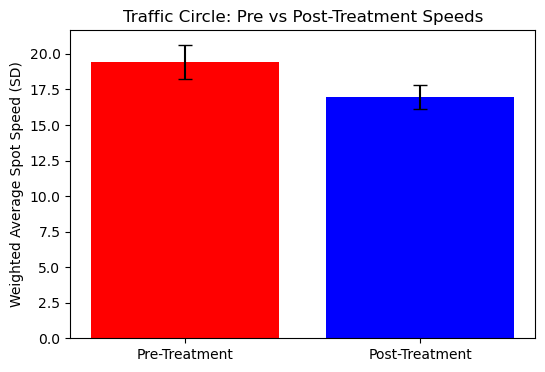

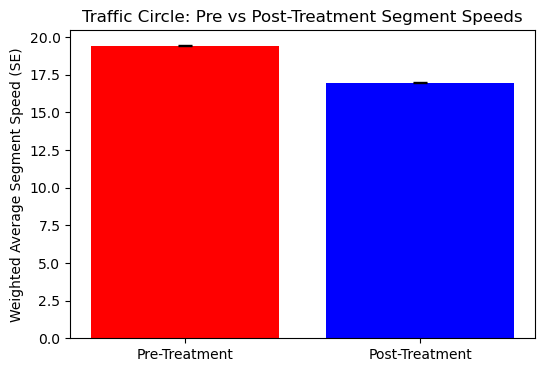

Highest value for pre-treatment'85th Speed Percentile': 32.0 mph Highest value for post-treatment'85th Speed Percentile': 28.0 mph
Row details:
Data Periods                                             Jun 01, 2021 - Jun 01, 2022
Mode of Travel                                All Vehicles - StL All Vehicles Volume
Zone ID                                                                          NaN
Zone Name                                             North Neptune Avenue / 1282320
Line Zone Length (Miles)                                                       0.201
Zone Is Pass-Through                                                             yes
Zone Direction (degrees)                                                         356
Zone is Bi-Direction                                                             yes
Year-Month                                                                   2022-02
Day Type                                                          3: Wednesday (W-W)
Day Pa

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,...,Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (StL Volume),Vehicle Hours of Delay (StL Volume),5th Speed Percentile,15th Speed Percentile,85th Speed Percentile,95th Speed Percentile
73,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 670543,0.302,yes,356,yes,2021-06,4: Thursday (Th-Th),...,22.0,49.0,23.933,0.929,16.12,0.05,2.0,18.0,29.0,47.0
619,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 1282320,0.201,yes,356,yes,2021-12,7: Sunday (Su-Su),...,22.0,33.0,23.715,0.910,6.33,0.03,6.0,17.0,31.0,44.0
271,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 670543,0.302,yes,356,yes,2021-08,5: Friday (F-F),...,20.0,54.0,22.935,0.880,14.61,0.09,2.0,11.0,26.0,44.0
499,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 1282320,0.201,yes,356,yes,2021-11,3: Wednesday (W-W),...,21.0,34.0,24.958,0.840,14.95,0.11,9.0,14.0,30.0,41.0
691,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 1282320,0.201,yes,356,yes,2022-01,3: Wednesday (W-W),...,21.0,35.0,24.543,0.852,13.55,0.10,8.0,15.0,31.0,39.0
787,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 1282320,0.201,yes,356,yes,2022-02,3: Wednesday (W-W),...,22.0,33.0,23.837,0.919,15.43,0.06,9.0,13.0,32.0,39.0
136,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 1282320,0.201,yes,356,yes,2021-07,6: Saturday (Sa-Sa),...,21.0,34.0,27.055,0.785,16.83,0.17,11.0,14.0,28.0,36.0
134,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 1282320,0.201,yes,356,yes,2021-07,6: Saturday (Sa-Sa),...,18.0,39.0,27.055,0.684,11.61,0.20,5.0,11.0,26.0,36.0
583,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 1282320,0.201,yes,356,yes,2021-12,1: Monday (M-M),...,22.0,33.0,23.715,0.933,9.93,0.03,13.0,16.0,31.0,36.0
680,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 1282320,0.201,yes,356,yes,2022-01,1: Monday (M-M),...,21.0,34.0,24.543,0.862,22.78,0.15,10.0,14.0,28.0,35.0


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

pre_treatment = pd.read_csv('data/Segment_pre.csv')
post_treatment = pd.read_csv('data/Segment_post.csv')

pre_filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
post_filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')

pre_treatment = pre_treatment[~pre_filters]
post_treatment = post_treatment[~post_filters]

#def filter_outliers(df, column, threshold=5):
    #valid_values = df[column].dropna()
    #z_scores = stats.zscore(valid_values)
    #valid_indices = valid_values.index[np.abs(z_scores) < threshold]
    #return df.loc[valid_indices]

#pre_treatment_filtered = filter_outliers(pre_treatment, '95th Speed Percentile')
#post_treatment_filtered = filter_outliers(post_treatment, '95th Speed Percentile')

#print("Pre-treatment data size before filtering:", pre_treatment.shape)
#print("Pre-treatment data size after filtering:", pre_treatment_filtered.shape)
#print("Post-treatment data size before filtering:", post_treatment.shape)
#print("Post-treatment data size after filtering:", post_treatment_filtered.shape)

pre_speeds = pre_treatment['Avg Segment Speed (mph)']
post_speeds = post_treatment['Avg Segment Speed (mph)']
pre_volume = pre_treatment['Average Daily Segment Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Segment Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)
pre_weighted_se = weighted_std(pre_speeds, pre_volume) / (len(pre_speeds) ** 0.5)
post_weighted_se = weighted_std(post_speeds, post_volume) / (len(post_speeds) ** 0.5)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)
plt.ylabel('Weighted Average Spot Speed (SD)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Segment Speed (SE)')
plt.title('Traffic Circle: Pre vs Post-Treatment Segment Speeds')
plt.show()

max_85th_speed_row_pre = pre_treatment.loc[pre_treatment['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment.loc[post_treatment['85th Speed Percentile'].idxmax()]

max_85th_speed_value_pre = max_85th_speed_row_pre['85th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['85th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")
print("Row details:")
print(max_85th_speed_row_pre,max_85th_speed_row_post )
top_speed = pre_treatment.sort_values('95th Speed Percentile', ascending = False).head(10)
top_speed



Weighted Pre-Treatment Speed: 50.29 mph
Weighted Post-Treatment Speed: 57.57 mph
T-Statistic: -63.977, P-Value: 0.000


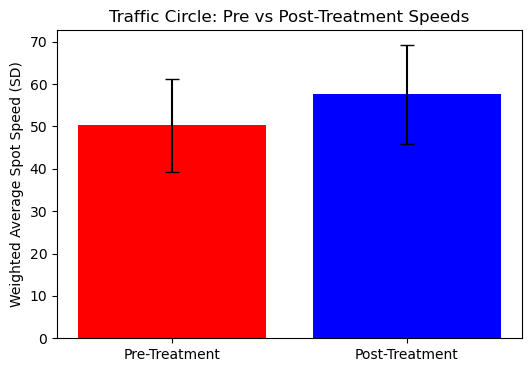

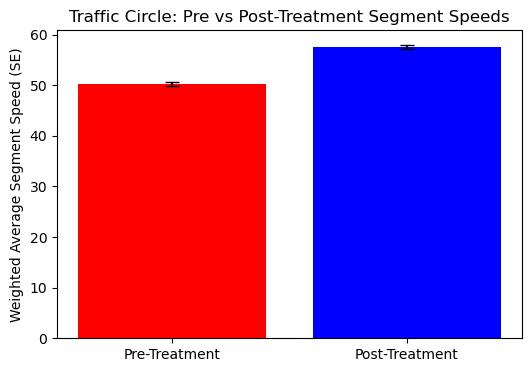

Highest value for pre-treatment'85th Speed Percentile': 32.0 mph Highest value for post-treatment'85th Speed Percentile': 28.0 mph
Row details:
Data Periods                                             Jun 01, 2021 - Jun 01, 2022
Mode of Travel                                All Vehicles - StL All Vehicles Volume
Zone ID                                                                          NaN
Zone Name                                             North Neptune Avenue / 1282320
Line Zone Length (Miles)                                                       0.201
Zone Is Pass-Through                                                             yes
Zone Direction (degrees)                                                         356
Zone is Bi-Direction                                                             yes
Year-Month                                                                   2022-02
Day Type                                                          3: Wednesday (W-W)
Day Pa

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,...,Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (StL Volume),Vehicle Hours of Delay (StL Volume),5th Speed Percentile,15th Speed Percentile,85th Speed Percentile,95th Speed Percentile
73,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 670543,0.302,yes,356,yes,2021-06,4: Thursday (Th-Th),...,22.0,49.0,23.933,0.929,16.12,0.05,2.0,18.0,29.0,47.0
619,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 1282320,0.201,yes,356,yes,2021-12,7: Sunday (Su-Su),...,22.0,33.0,23.715,0.910,6.33,0.03,6.0,17.0,31.0,44.0
271,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 670543,0.302,yes,356,yes,2021-08,5: Friday (F-F),...,20.0,54.0,22.935,0.880,14.61,0.09,2.0,11.0,26.0,44.0
499,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 1282320,0.201,yes,356,yes,2021-11,3: Wednesday (W-W),...,21.0,34.0,24.958,0.840,14.95,0.11,9.0,14.0,30.0,41.0
691,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 1282320,0.201,yes,356,yes,2022-01,3: Wednesday (W-W),...,21.0,35.0,24.543,0.852,13.55,0.10,8.0,15.0,31.0,39.0
787,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 1282320,0.201,yes,356,yes,2022-02,3: Wednesday (W-W),...,22.0,33.0,23.837,0.919,15.43,0.06,9.0,13.0,32.0,39.0
136,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 1282320,0.201,yes,356,yes,2021-07,6: Saturday (Sa-Sa),...,21.0,34.0,27.055,0.785,16.83,0.17,11.0,14.0,28.0,36.0
134,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 1282320,0.201,yes,356,yes,2021-07,6: Saturday (Sa-Sa),...,18.0,39.0,27.055,0.684,11.61,0.20,5.0,11.0,26.0,36.0
583,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 1282320,0.201,yes,356,yes,2021-12,1: Monday (M-M),...,22.0,33.0,23.715,0.933,9.93,0.03,13.0,16.0,31.0,36.0
680,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Neptune Avenue / 1282320,0.201,yes,356,yes,2022-01,1: Monday (M-M),...,21.0,34.0,24.543,0.862,22.78,0.15,10.0,14.0,28.0,35.0


In [12]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

pre_treatment = pd.read_csv('data/Segment_pre.csv')
post_treatment = pd.read_csv('data/Segment_post.csv')

pre_filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
post_filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')

pre_treatment = pre_treatment[~pre_filters]
post_treatment = post_treatment[~post_filters]

#def filter_outliers(df, column, threshold=5):
    #valid_values = df[column].dropna()
    #z_scores = stats.zscore(valid_values)
    #valid_indices = valid_values.index[np.abs(z_scores) < threshold]
    #return df.loc[valid_indices]

#pre_treatment_filtered = filter_outliers(pre_treatment, '95th Speed Percentile')
#post_treatment_filtered = filter_outliers(post_treatment, '95th Speed Percentile')

#print("Pre-treatment data size before filtering:", pre_treatment.shape)
#print("Pre-treatment data size after filtering:", pre_treatment_filtered.shape)
#print("Post-treatment data size before filtering:", post_treatment.shape)
#print("Post-treatment data size after filtering:", post_treatment_filtered.shape)

pre_speeds = pre_treatment['Avg Segment Travel Time (sec)']
post_speeds = post_treatment['Avg Segment Travel Time (sec)']
pre_volume = pre_treatment['Average Daily Segment Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Segment Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)
pre_weighted_se = weighted_std(pre_speeds, pre_volume) / (len(pre_speeds) ** 0.5)
post_weighted_se = weighted_std(post_speeds, post_volume) / (len(post_speeds) ** 0.5)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Travel Time: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Travel Time: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)
plt.ylabel('Weighted Average Spot Speed (SD)')
plt.title('Traffic Circle: Pre vs Post-Treatment Travel Time')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Segment Speed (SE)')
plt.title('Traffic Circle: Pre vs Post-Treatment Segment Travel Time')
plt.show()

#max_85th_speed_row_pre = pre_treatment_filtered.loc[pre_treatment_filtered['85th Speed Percentile'].idxmax()]
#max_85th_speed_row_post = post_treatment_filtered.loc[post_treatment_filtered['85th Speed Percentile'].idxmax()]

max_85th_speed_value_pre = max_85th_speed_row_pre['85th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['85th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")
print("Row details:")
print(max_85th_speed_row_pre,max_85th_speed_row_post )
top_speed = pre_treatment.sort_values('95th Speed Percentile', ascending = False).head(10)
top_speed

